## pair0045: 
Mean daily sea level pressure on a 144x73 grid (2.5 degree) of day 50 and day 51 of year 2000.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest   

In [2]:
# Empty list to store preprocess data
preprocess_data = []

# Open the dataset and process each line
with open('datasets/pair0045.txt', 'r') as file:
    for data in file:
        # Clean the data by splitting by any whitespace
        # Joining them with a single space
        # Add each processed row of data to the list --> preprocess_data
        processed_data = ' '.join(data.split())
        preprocess_data.append(processed_data)  

# Split into two columns
preprocess_data = [line.split() for line in preprocess_data]

# Convert to DataFrame with column names
df = pd.DataFrame(preprocess_data, columns=['year 2000, day 50', 'year 2000, day 51'])

# Convert to numeric values
df['year 2000, day 50'] = pd.to_numeric(df['year 2000, day 50'])
df['year 2000, day 51'] = pd.to_numeric(df['year 2000, day 51'])

In [3]:
# Display few rows of the dataset
print(df.head())

   year 2000, day 50  year 2000, day 51
0           102772.0           102370.0
1           102520.0           102097.0
2           102517.0           102097.0
3           102515.0           102100.0
4           102515.0           102102.0


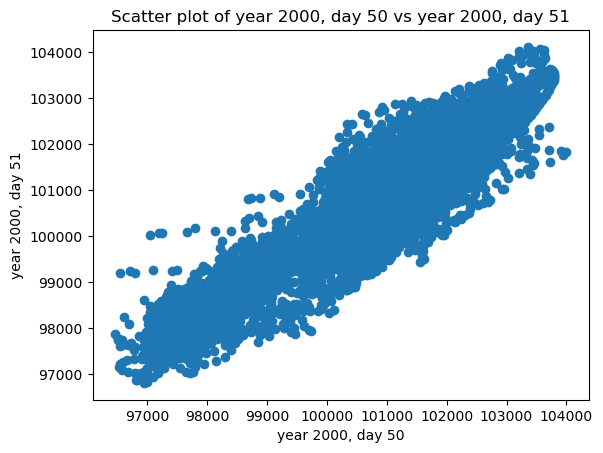

In [4]:
# Scatter Plot
plt.scatter(df['year 2000, day 50'], df['year 2000, day 51'])
plt.xlabel('year 2000, day 50')
plt.ylabel('year 2000, day 51')
plt.title('Scatter plot of year 2000, day 50 vs year 2000, day 51')
plt.show()

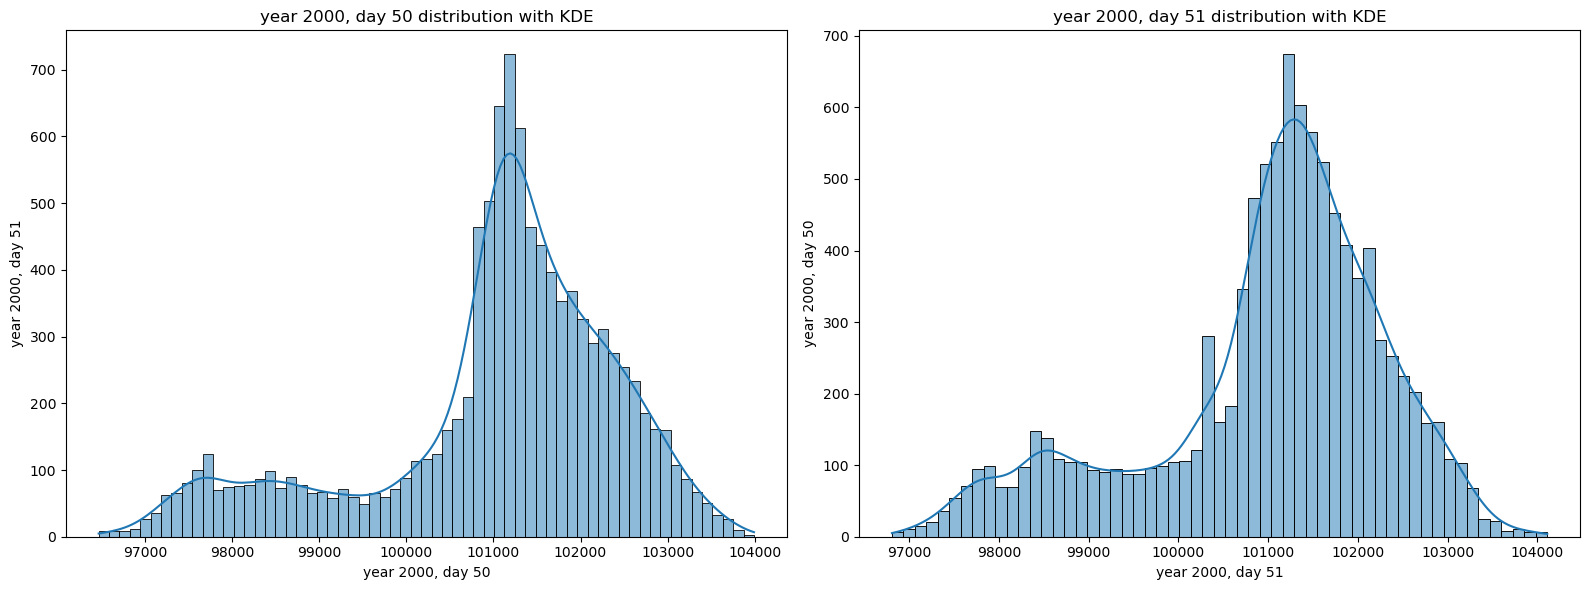

In [5]:
# Plot the distribution of the data in both directions (x and y)
fig, axis = plt.subplots(1, 2, figsize=(16,6))

# Plot for year 2000, day 50 -> year 2000, day 51 (X -> Y)
sns.histplot(df['year 2000, day 50'], kde=True, ax=axis[0])
axis[0].set_xlabel('year 2000, day 50')
axis[0].set_ylabel('year 2000, day 51')
axis[0].set_title('year 2000, day 50 distribution with KDE')

# Plot for year 2000, day 51 -> year 2000, day 50 (Y -> X)
sns.histplot(df['year 2000, day 51'], kde=True, ax=axis[1])
axis[1].set_xlabel('year 2000, day 51')
axis[1].set_ylabel('year 2000, day 50')
axis[1].set_title('year 2000, day 51 distribution with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()
plt.show()  

In [6]:
# Dip-Test for x and y
dip_test, p_val = diptest(np.array(df['year 2000, day 50']))
print(f"Dip-Test (X → Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(np.array(df['year 2000, day 51']))
print(f"Dip-Test (Y → X): {dip_test}, p-value: {p_val}")
    

Dip-Test (X → Y): 0.006133952477612203, p-value: 0.010992231402379926
Dip-Test (Y → X): 0.006991995370816858, p-value: 0.0016763517529942984


### Findings:
- The ground truth relationship is X → Y
- The dip test results suggest that the distribution of X → Y direction may be **multimodal**, supported by a low p-value 0.01, that provide some evidence against unimodality.
- Similarly, the distribution of Y → X direction also suggest **multimodal**, supported by a low p-value 0.002, that provide srtong evidence against unimodality